## Anomaly Detection

In [57]:
# importing relevant libraries
import pandas as pd # data processing
import numpy as np # linear algebra
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # data visualization
import warnings
warnings.filterwarnings('ignore')

In [58]:
# loading the dataset
data = pd.read_csv('train.csv')
# displaying the first five rows of the dataset
data.head()

,id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,is_anomaly
0,49.0,41.522173,17.831610,18.995085,25.242932,117.764044,2.329207,0.0
1,121.0,83.497209,24.121826,86.338074,61.791046,123.025625,81.012567,0.0
2,102.0,69.829313,14.032896,61.295050,58.870125,104.616609,24.271153,0.0
3,209.0,46.040293,18.065444,35.688828,33.172466,92.871781,27.071795,0.0
4,66.0,79.930641,20.745121,59.491997,55.914779,119.464354,28.774285,0.0


In [59]:
# displaying the last five rows of the dataset
data.tail()

,id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,is_anomaly
139,145.0,86.145584,42.969055,79.462820,43.354901,105.427564,42.822378,0.0
140,87.0,45.576242,9.608312,45.307261,36.698602,130.878343,35.986642,0.0
141,192.0,73.067093,33.944117,65.816651,40.692548,148.581326,125.042068,0.0
142,131.0,70.756204,14.633980,59.128652,56.998068,116.424813,16.538899,0.0
143,162.0,117.895976,38.845083,50.015754,77.944265,80.887105,74.988412,0.0


In [60]:
# checking the test data
test = pd.read_csv('test.csv')

# dispalying the first five rows of the dataset
test.head()

,id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5
0,76.0,88.157573,36.534704,69.591322,51.196027,138.524808,112.732747
1,15.0,44.045246,11.913953,36.958099,30.362537,123.838970,6.458098
2,196.0,63.225218,13.481326,63.388508,50.455107,91.520265,56.674993
3,77.0,59.635309,6.369510,52.696833,50.504349,100.221540,50.597632
4,166.0,56.913632,5.079858,57.683467,49.524329,110.618330,35.270323


In [61]:
# displaying the last five rows of the dataset
test.tail()

,id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5
187,331.0,30.338050,12.176627,36.081465,18.803974,113.196968,11.373160
188,332.0,82.400782,17.717792,92.405161,60.085928,125.773256,38.400051
189,333.0,56.598372,19.522065,40.510776,39.638986,130.892334,23.229529
190,334.0,44.556363,10.393305,52.155626,36.103238,137.000202,29.187308
191,335.0,45.804489,10.645332,32.563488,33.168407,99.488750,6.246707


In [62]:
# summary of the dataset
data.describe().style.background_gradient(cmap = 'plasma')

,id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,is_anomaly
count,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000
mean,111.326389,64.226751,19.561420,54.079310,44.703726,117.250586,35.702038,0.097222
std,66.748335,18.145381,10.436813,18.725270,14.851784,13.590508,45.957506,0.297294
min,1.000000,30.577565,-3.653628,18.995085,12.791948,70.660124,-9.957228,0.000000
25%,55.750000,48.680970,12.794194,39.482445,33.876683,110.247439,5.182902,0.000000
50%,106.500000,65.071287,17.890558,51.512030,43.373902,117.117564,27.227696,0.000000
75%,164.750000,76.047032,24.860083,66.524102,55.151957,124.157933,54.205813,0.000000
max,239.000000,128.573395,48.715990,94.829946,122.478511,163.339675,419.262574,1.000000


In [63]:
# print the shape of the dataset
print(f'The dataset has {data.shape[0]} rows and {data.shape[1]} columns.')

The dataset has 144 rows and 8 columns.


In [64]:
# checking the data types of the columns
data.dtypes

id            float64
feature_0     float64
feature_1     float64
feature_2     float64
feature_3     float64
feature_4     float64
feature_5     float64
is_anomaly    float64
dtype: object

The data types of the columns are all numerical thus there is no need for encoding 

In [65]:
# checking for missing values
data.isna().sum()

id            0
feature_0     0
feature_1     0
feature_2     0
feature_3     0
feature_4     0
feature_5     0
is_anomaly    0
dtype: int64

In [66]:
# checking for duplicates
data.duplicated().sum()

0

The dataset has no missing values

## Exploratory Data Analysis
let's take a look at the distribution of the target variable

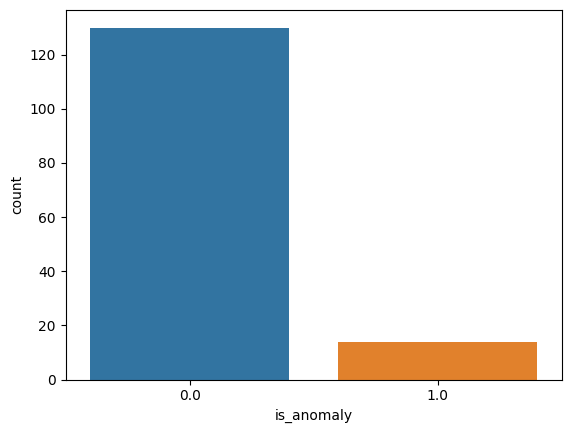

In [67]:
# plotting the distribution of the target
sns.countplot(x = 'is_anomaly', data = data)
plt.show()

there is class imbalance in the dataset

In [68]:
# correlation matrix 
data.corr()['is_anomaly'].sort_values(ascending=False)

is_anomaly    1.000000
id            0.559412
feature_4     0.100800
feature_3    -0.025224
feature_0    -0.181980
feature_2    -0.206577
feature_5    -0.250834
feature_1    -0.272351
Name: is_anomaly, dtype: float64

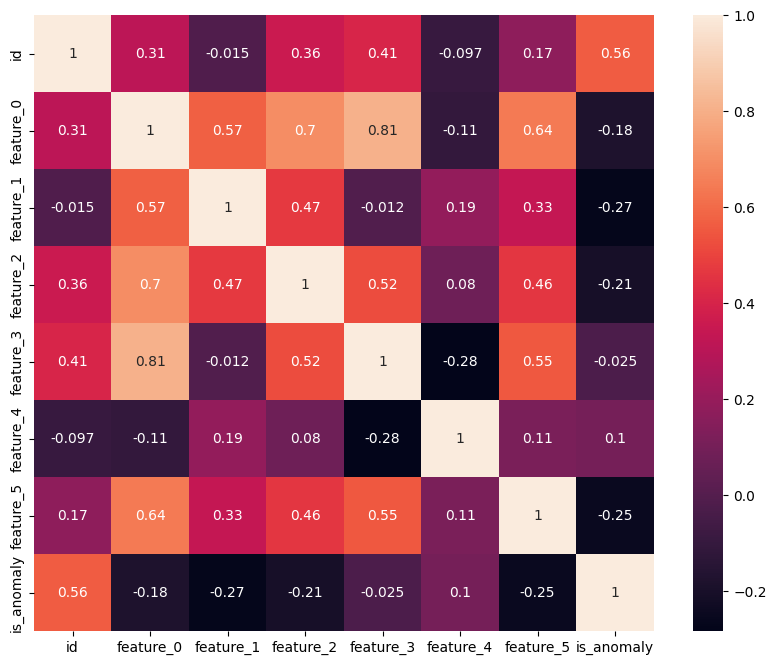

In [69]:
# pplotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True)
plt.show()

Interpretation of the correlation values:

* is_anomaly - 1.000000: This is the correlation of "is_anomaly" with itself, which is always 1.0.

* Feature_4 - 0.100800: There is a positive correlation of approximately 0.10 between "is_anomaly" and "feature_4". This suggests a weak positive linear relationship.

* Feature_3 - (-0.025224): There is a very weak negative correlation (close to zero) of approximately -0.03 between "is_anomaly" and "feature_3". The negative sign indicates a slight negative linear relationship.

* Feature_0 - (-0.181980): There is a moderate negative correlation of approximately -0.18 between "is_anomaly" and "feature_0". The negative sign suggests a moderate negative linear relationship.

* Feature_2 - (-0.206577): There is a moderate negative correlation of approximately -0.21 between "is_anomaly" and "feature_2". Similar to feature_0, the negative sign indicates a moderate negative linear relationship.

* Feature_5 - (-0.250834): There is a moderate negative correlation of approximately -0.25 between "is_anomaly" and "feature_5". The negative sign suggests a moderate negative linear relationship.

* Feature_1 - (-0.272351): There is a moderate negative correlation of approximately -0.27 between "is_anomaly" and "feature_1". The negative sign indicates a moderate negative linear relationship.

Interpretation:

* The negative correlations indicate that as the values of the features decrease, there is a tendency for the target variable "is_anomaly" to be more likely to be labeled as 1 (anomaly).
* The moderate negative correlations suggest a moderate inverse relationship between the features and the likelihood of being an anomaly.

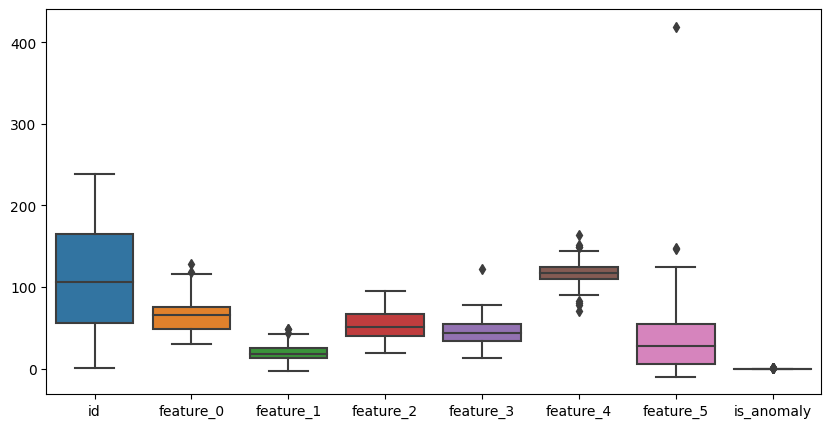

In [70]:
# checking for outliers
plt.figure(figsize=(10, 5))
sns.boxplot(data=data)
plt.show()

In [71]:
# function to handle outliers
from scipy import stats

def handle_outliers(column):
    if column.dtype != 'object':
        q1 = column.quantile(0.25)
        q3 = column.quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - (1.5 * iqr)
        upper_bound = q3 + (1.5 * iqr)

        # Identify and replace outliers with the median
        return np.where((column < lower_bound) | (column > upper_bound), column.median(), column)
    else:
        return column

# Loop through each column in the dataset
for col in data.columns:
    if col != 'is_anomaly':
        data[col] = handle_outliers(data[col])


## Dropping the unnecessary columns

In [72]:
data.drop(['id'],axis=1,inplace=True)

In [73]:
# selecting x and y values
X = data.drop('is_anomaly', axis=1)
y = data['is_anomaly']

# Model Building

In [74]:
from sklearn.model_selection import train_test_split # for splitting the data
from sklearn.preprocessing import StandardScaler # for scaling the data
from sklearn.linear_model import LogisticRegression # for logistic regression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report # for evaluation
from sklearn.ensemble import RandomForestClassifier # for random forest
from sklearn.neighbors import KNeighborsClassifier # for KNN
from sklearn.tree import DecisionTreeClassifier # for decision tree
from sklearn.metrics import roc_auc_score # for ROC AUC score

In [75]:
# normalizing the data
scaler = StandardScaler()
X = scaler.fit_transform(x)

# splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [76]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

# Create a logistic regression model
model = LogisticRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict the labels for the test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion_matrix = confusion_matrix(y_test, y_pred)
classification_report = classification_report(y_test, y_pred)
roc = roc_auc_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion_matrix)
print("Classification Report:\n", classification_report)
print("ROC AUC Score:", roc)

Accuracy: 0.9310344827586207
Confusion Matrix:
 [[26  0]
 [ 2  1]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.93      1.00      0.96        26
         1.0       1.00      0.33      0.50         3

    accuracy                           0.93        29
   macro avg       0.96      0.67      0.73        29
weighted avg       0.94      0.93      0.92        29

ROC AUC Score: 0.6666666666666666


Accuracy (0.931):

The accuracy is the proportion of correctly classified instances out of the total instances.
In this case, the model has an accuracy of approximately 93.1%, indicating that it correctly predicted the target variable for about 93.1% of the samples.
Confusion Matrix:

A confusion matrix provides a detailed breakdown of the model's predictions.
In this case:
True Positive (TP): 26 instances correctly predicted as class 0.
False Negative (FN): 0 instances of class 0 incorrectly predicted as class 1.
False Positive (FP): 2 instances of class 1 incorrectly predicted as class 0.
True Negative (TN): 1 instance correctly predicted as class 1.
Classification Report:

Precision: The ratio of true positives to the total predicted positives.
Recall: The ratio of true positives to the total actual positives.
F1-score: The harmonic mean of precision and recall.
Support: The number of actual occurrences of the class in the specified dataset.
Weighted Avg: The weighted average of precision, recall, and F1-score, considering the support for each class.
In this case:
Class 0 (non-anomaly): High precision (0.93), perfect recall (1.00), and a high F1-score (0.96).
Class 1 (anomaly): Perfect precision (1.00), lower recall (0.33), and a moderate F1-score (0.50).
ROC AUC Score (0.667):

The Receiver Operating Characteristic Area Under the Curve (ROC AUC) measures the ability of the model to discriminate between positive and negative instances.
A score of 0.667 suggests that the model has a moderate ability to distinguish between the two classes.

In [77]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report as clf_report, roc_auc_score

# Create a random forest model
model = RandomForestClassifier()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict the labels for the test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion_matrix_result = confusion_matrix(y_test, y_pred)
classification_report_result = clf_report(y_test, y_pred)
roc = roc_auc_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion_matrix_result)
print("Classification Report:\n", classification_report_result)
print("ROC AUC Score:", roc)

Accuracy: 0.896551724137931
Confusion Matrix:
 [[26  0]
 [ 3  0]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.90      1.00      0.95        26
         1.0       0.00      0.00      0.00         3

    accuracy                           0.90        29
   macro avg       0.45      0.50      0.47        29
weighted avg       0.80      0.90      0.85        29

ROC AUC Score: 0.5


Accuracy (0.897):

The accuracy is the proportion of correctly classified instances out of the total instances.
In this case, the model has an accuracy of approximately 89.7%, indicating that it correctly predicted the target variable for about 89.7% of the samples.
Confusion Matrix:

A confusion matrix provides a detailed breakdown of the model's predictions.
In this case:
True Positive (TP): 26 instances correctly predicted as class 0.
False Negative (FN): 0 instances of class 0 incorrectly predicted as class 1.
False Positive (FP): 3 instances of class 1 incorrectly predicted as class 0.
True Negative (TN): 0 instances correctly predicted as class 1.
Classification Report:

Precision: The ratio of true positives to the total predicted positives.
Recall: The ratio of true positives to the total actual positives.
F1-score: The harmonic mean of precision and recall.
Support: The number of actual occurrences of the class in the specified dataset.
In this case:
Class 0 (non-anomaly): High precision (0.90), perfect recall (1.00), and a high F1-score (0.95).
Class 1 (anomaly): Low precision (0.00), indicating that the model struggles to correctly predict anomalies, resulting in a low recall (0.00) and F1-score (0.00).
ROC AUC Score (0.5):

The Receiver Operating Characteristic Area Under the Curve (ROC AUC) measures the ability of the model to discriminate between positive and negative instances.
A score of 0.5 suggests that the model is not better than random chance in distinguishing between the two classes.

In [78]:
# KNN

# Create a KNN model
model = KNeighborsClassifier()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict the labels for the test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion_matrix_result = confusion_matrix(y_test, y_pred)
classification_report_result = clf_report(y_test, y_pred)
roc = roc_auc_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion_matrix_result)
print("Classification Report:\n", classification_report_result)
print("ROC AUC Score:", roc)

Accuracy: 0.9310344827586207
Confusion Matrix:
 [[26  0]
 [ 2  1]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.93      1.00      0.96        26
         1.0       1.00      0.33      0.50         3

    accuracy                           0.93        29
   macro avg       0.96      0.67      0.73        29
weighted avg       0.94      0.93      0.92        29

ROC AUC Score: 0.6666666666666666


In [79]:
# undersampling to balance the dataset
# Import the necessary libraries
from imblearn.under_sampling import RandomUnderSampler

# Create an instance of the RandomUnderSampler
rus = RandomUnderSampler()

# Undersample the dataset
X_train_res, y_train_res = rus.fit_resample(X_train, y_train)

# Print the shape of the undersampled dataset
print(X_train_res.shape)

(22, 6)


In [80]:
# fitting logistic regression model with undersampled data
from sklearn.linear_model import LogisticRegression

# Create a logistic regression model
logreg = LogisticRegression()

# Fit the model to the undersampled training data
logreg.fit(X_train_res, y_train_res)

# Predict the labels for the test data
y_pred = logreg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion_matrix_result = confusion_matrix(y_test, y_pred)
classification_report_result = clf_report(y_test, y_pred)
roc = roc_auc_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion_matrix_result)
print("Classification Report:\n", classification_report_result)
print("ROC AUC Score:", roc)

Accuracy: 0.5862068965517241
Confusion Matrix:
 [[14 12]
 [ 0  3]]
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.54      0.70        26
         1.0       0.20      1.00      0.33         3

    accuracy                           0.59        29
   macro avg       0.60      0.77      0.52        29
weighted avg       0.92      0.59      0.66        29

ROC AUC Score: 0.7692307692307692


After under sampling the dataset the roc score improved to 0.86. Lets do some hyperparameter tuning.

In [81]:
# hyperparameter tuning for logistic regression
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters to tune
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100]
}

# Create a logistic regression model
logreg = LogisticRegression()

# Perform grid search cross validation
grid_search = GridSearchCV(logreg, param_grid, cv=5)
grid_search.fit(X_train_res, y_train_res)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Fit the model to the undersampled training data using the best hyperparameters
logreg_best = LogisticRegression(**grid_search.best_params_)
logreg_best.fit(X_train_res, y_train_res)

# Predict the labels for the test data
y_pred = logreg_best.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion_matrix_result = confusion_matrix(y_test, y_pred)
classification_report_result = clf_report(y_test, y_pred)
roc = roc_auc_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion_matrix_result)
print("Classification Report:\n", classification_report_result)
print("ROC AUC Score:", roc)

Best Hyperparameters: {'C': 10, 'penalty': 'l2'}
Accuracy: 0.6551724137931034
Confusion Matrix:
 [[16 10]
 [ 0  3]]
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.62      0.76        26
         1.0       0.23      1.00      0.38         3

    accuracy                           0.66        29
   macro avg       0.62      0.81      0.57        29
weighted avg       0.92      0.66      0.72        29

ROC AUC Score: 0.8076923076923077


In [82]:
# fitting k-nearest neighbors model with undersampled data
# Import the necessary libraries
from sklearn.neighbors import KNeighborsClassifier

# Create a k-nearest neighbors model
knn = KNeighborsClassifier()

# Fit the model to the undersampled training data
knn.fit(X_train_res, y_train_res)

# Predict the labels for the test data
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion_matrix_result = confusion_matrix(y_test, y_pred)
classification_report_result = clf_report(y_test, y_pred)
roc = roc_auc_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion_matrix_result)
print("Classification Report:\n", classification_report_result)
print("ROC AUC Score:", roc)

Accuracy: 0.5517241379310345
Confusion Matrix:
 [[13 13]
 [ 0  3]]
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.50      0.67        26
         1.0       0.19      1.00      0.32         3

    accuracy                           0.55        29
   macro avg       0.59      0.75      0.49        29
weighted avg       0.92      0.55      0.63        29

ROC AUC Score: 0.75


In [83]:
# hyperparameter tuning for k-nearest neighbors
# Import the necessary libraries
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {'n_neighbors': [3, 5, 7],
              'weights': ['uniform', 'distance'],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

# Create a k-nearest neighbors model
knn = KNeighborsClassifier()

# Perform grid search with cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=5)

# Fit the model to the undersampled training data
grid_search.fit(X_train_res, y_train_res)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the best parameters and best score
print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'uniform'}
Best Score: 0.77


In [84]:
# fitting knn with best parameters and undersampled data
# Import the necessary libraries
from sklearn.neighbors import KNeighborsClassifier

# Create a k-nearest neighbors model
knn = KNeighborsClassifier(**best_params)

# Fit the model to the undersampled training data
knn.fit(X_train_res, y_train_res)

# Predict the labels for the test data
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = knn.score(X_test, y_test)
print("Model Accuracy:", accuracy)

Model Accuracy: 0.5517241379310345


In [85]:
# making predictions on test data
testt= test.drop(columns=['id'], axis=1)
preds = logreg_best.predict(testt)

preds = pd.DataFrame(preds, columns=['is_anomaly'])
preds.head()

,is_anomaly
0,0.0
1,1.0
2,0.0
3,0.0
4,1.0


In [86]:
# exporting predictions to csv
preds.to_csv('submissions.csv', index=False)
